In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

## Preprocessing

In [2]:
df = pd.read_csv("/kaggle/input/car-sales/Car_sales.csv")
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [4]:
df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [5]:
df[df.isna().any(axis=1)]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
7,BMW,323i,19.747,NaN,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
15,Cadillac,Seville,15.943,27.100,Passenger,44.475,4.6,275.0,112.2,75.0,201.0,NaN,18.5,22.0,4/29/2011,115.621358
18,Cadillac,Escalade,14.785,NaN,Car,46.225,5.7,255.0,117.5,77.0,201.2,5.572,30.0,15.0,4/17/2012,109.509117
27,Chevrolet,Impala,107.995,NaN,Passenger,18.890,3.4,180.0,110.5,73.0,200.0,3.389,17.0,27.0,6/18/2011,71.838039
33,Chrysler,Town & Country,53.480,19.540,Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/13/2011,NaN
34,Chrysler,300M,30.696,NaN,Passenger,29.185,3.5,253.0,113.0,74.4,197.8,3.567,17.0,23.0,2/10/2012,101.655244
38,Dodge,Intrepid,88.028,12.275,Passenger,22.505,2.7,202.0,113.0,74.7,203.7,3.489,17.0,NaN,6/2/2012,80.831470
44,Dodge,Durango,101.323,NaN,Car,26.310,5.2,230.0,115.7,71.7,193.5,4.394,25.0,17.0,6/27/2012,92.854125
50,Ford,Focus,175.670,NaN,Passenger,12.315,2.0,107.0,103.0,66.9,174.8,2.564,13.2,30.0,7/22/2012,43.117132


In [6]:
df = df.drop(columns=['__year_resale_value'])
df = df.dropna().reset_index()
df.isna().sum()

index                 0
Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

In [7]:
df.columns

Index(['index', 'Manufacturer', 'Model', 'Sales_in_thousands', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [8]:
df.dtypes

index                   int64
Manufacturer           object
Model                  object
Sales_in_thousands    float64
Vehicle_type           object
Price_in_thousands    float64
Engine_size           float64
Horsepower            float64
Wheelbase             float64
Width                 float64
Length                float64
Curb_weight           float64
Fuel_capacity         float64
Fuel_efficiency       float64
Latest_Launch          object
Power_perf_factor     float64
dtype: object

In [9]:
df['Manufacturer'] = df['Manufacturer'].astype("category")
df['Model'] = df['Model'].astype("category")
df['Vehicle_type'] = df['Vehicle_type'].astype("category")
df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'])

In [10]:
df.describe(include='category').T

,count,unique,top,freq
Manufacturer,152,30,Ford,11
Model,152,151,Neon,2
Vehicle_type,152,2,Passenger,112


In [11]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,152.0,53.359072,68.938380,0.110000,13.714000,29.213000,68.069750,540.561000
Price_in_thousands,152.0,27.331822,14.418669,9.235000,17.888750,22.747000,31.938750,85.500000
Engine_size,152.0,3.049342,1.049818,1.000000,2.300000,3.000000,3.575000,8.000000
Horsepower,152.0,184.809211,56.823152,55.000000,147.500000,175.000000,211.250000,450.000000
Wheelbase,152.0,107.413816,7.717839,92.600000,102.900000,107.000000,112.200000,138.700000
Width,152.0,71.088816,3.464666,62.600000,68.375000,70.400000,73.100000,79.900000
Length,152.0,187.059211,13.471247,149.400000,177.475000,186.650000,195.125000,224.500000
Curb_weight,152.0,3.376184,0.636593,1.895000,2.964750,3.336000,3.821500,5.572000
Fuel_capacity,152.0,17.959211,3.937582,10.300000,15.775000,17.200000,19.800000,32.000000
Fuel_efficiency,152.0,23.842105,4.304788,15.000000,21.000000,24.000000,26.000000,45.000000


## EDA

In [12]:
nums = df.select_dtypes('float64').columns
cat = df.select_dtypes('category').columns

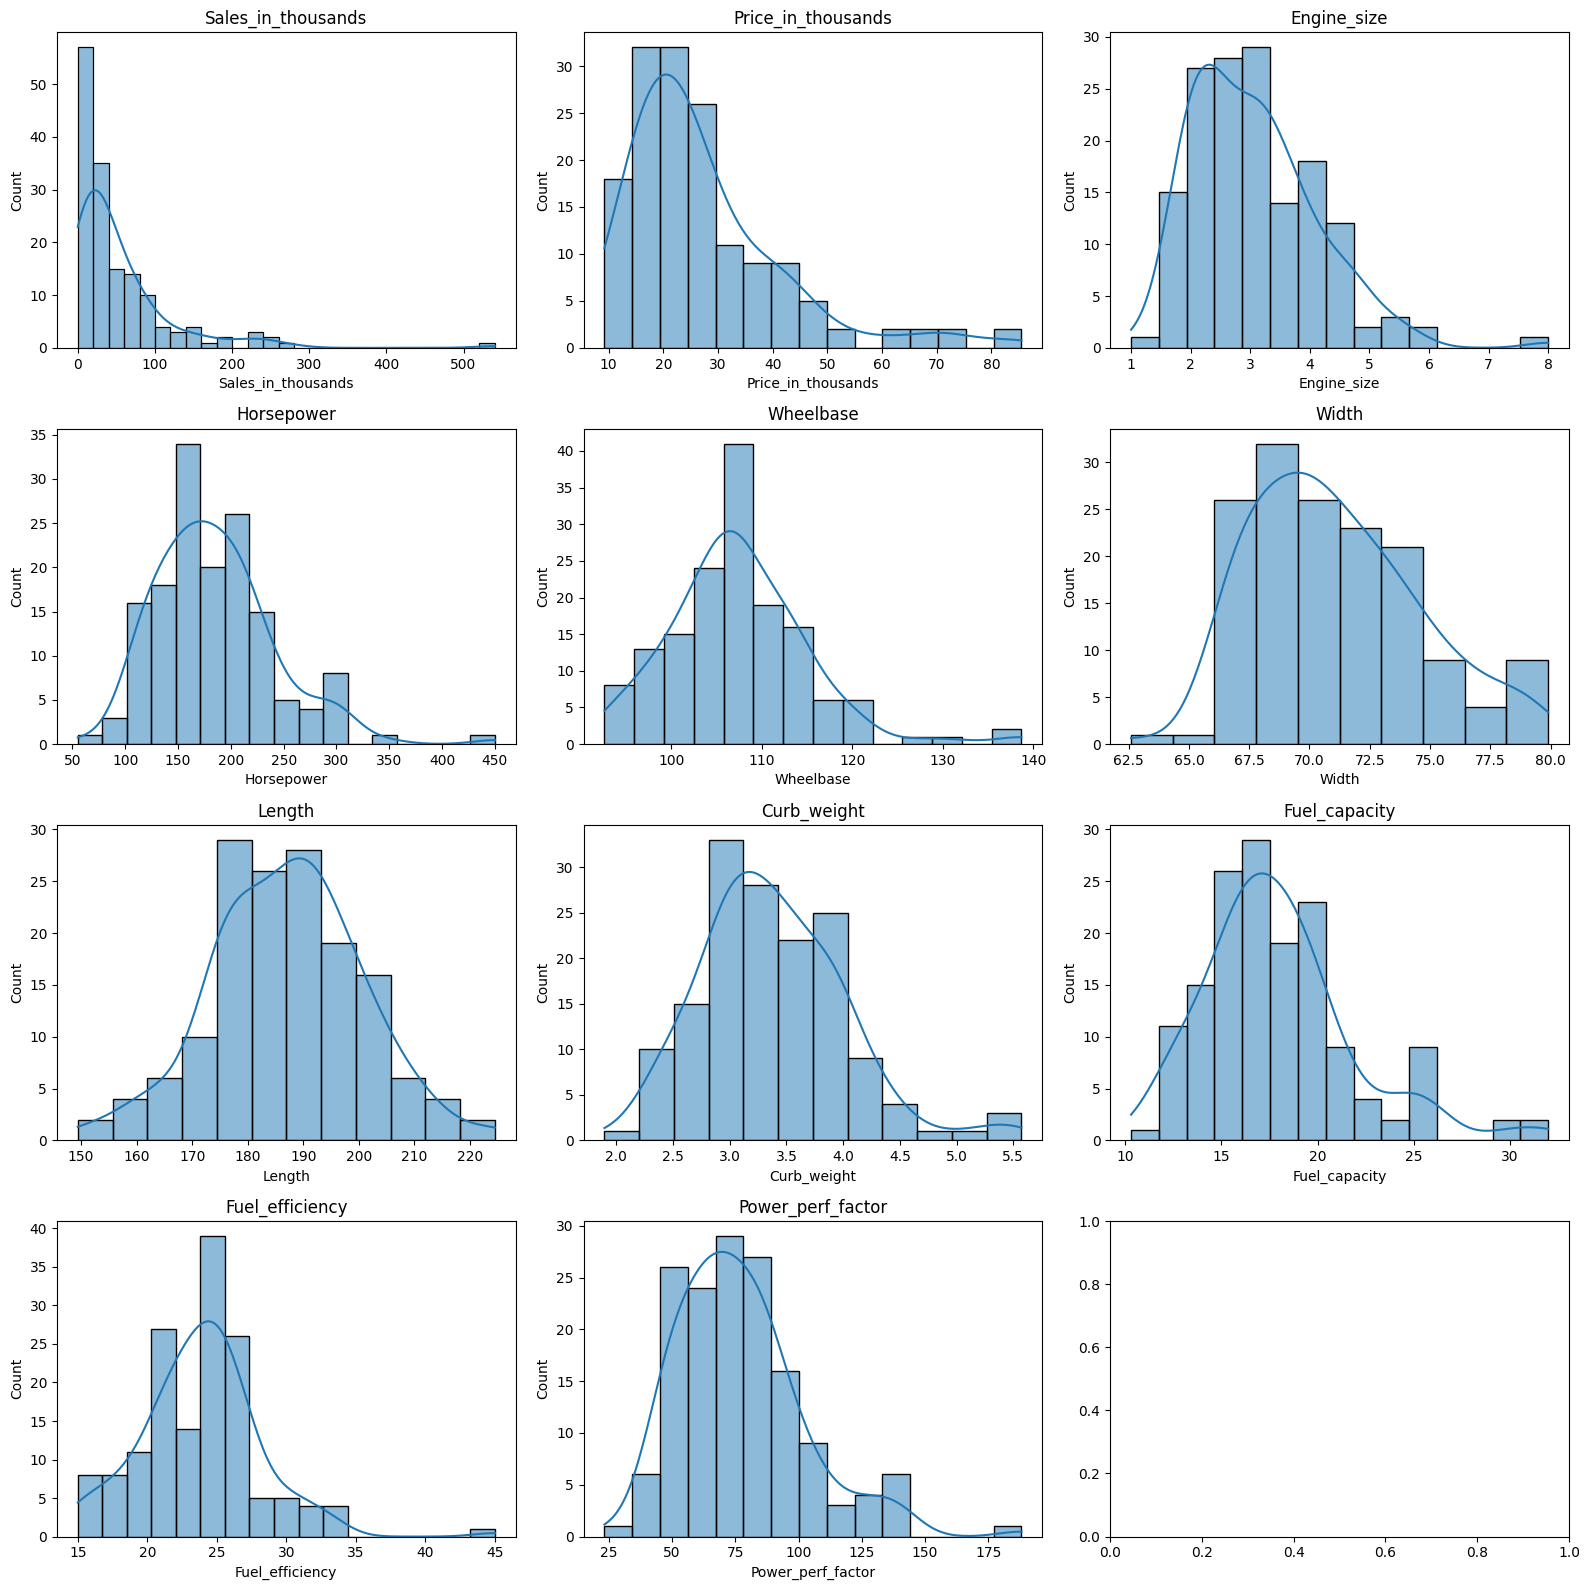

In [13]:
from math import ceil
cols = 3
rows = ceil(len(nums) / cols)
fig, axs = plt.subplots(rows, cols, figsize=(16, 4*rows))

axs = axs.flatten()
for num, ax in zip(nums, axs):
    sns.histplot(data=df, x=num, kde=True, ax=ax)
    ax.set_title(num)

plt.tight_layout()
plt.show()

- Sales are right-skewed and there are many low-sales models and a few high sale outliers.
- Price is also skewed right.
- The other variables look roughly normal.

# Find Outliers

In [14]:
sales = df['Sales_in_thousands']
z_sales = (sales - np.mean(sales))/np.std(sales)
sales_outliers = np.abs(z_sales) > 2.5
df[sales_outliers].sort_values(by='Sales_in_thousands', ascending=False)

,index,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
52,56,Ford,F-Series,540.561,Car,26.935,4.6,220.0,138.5,79.1,224.5,4.241,25.1,18.0,2012-08-16,89.401935
48,52,Ford,Explorer,276.747,Car,31.930,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19.0,2012-04-25,87.635496
132,137,Toyota,Camry,247.994,Passenger,17.518,2.2,133.0,105.2,70.1,188.5,2.998,18.5,27.0,2011-02-10,54.372420
45,49,Ford,Taurus,245.815,Passenger,17.885,3.0,155.0,108.5,73.0,197.6,3.368,16.0,24.0,2011-12-20,62.503740
54,58,Honda,Accord,230.902,Passenger,15.350,2.3,135.0,106.9,70.3,188.8,2.932,17.1,27.0,2012-05-20,54.269548
36,40,Dodge,Ram Pickup,227.061,Car,19.460,5.2,230.0,138.7,79.3,224.2,4.470,26.0,17.0,2012-03-06,90.211700


In [15]:
prices = df['Price_in_thousands']
z_prices = (prices - np.mean(prices))/np.std(prices)
prices_outliers = np.abs(z_prices) > 2.5
df[prices_outliers].sort_values(by='Price_in_thousands', ascending=False)

,index,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
95,99,Mercedes-B,CL500,0.954,Passenger,85.500,5.0,302.0,113.6,73.1,196.6,4.115,23.2,20.0,2011-04-11,141.100985
91,95,Mercedes-B,SL-Class,3.311,Passenger,82.600,5.0,302.0,99.0,71.3,177.1,4.125,21.1,20.0,2011-03-17,139.982294
121,126,Porsche,Carrera Cabrio,1.866,Passenger,74.970,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,2011-07-11,135.914710
120,125,Porsche,Carrera Coupe,1.280,Passenger,71.020,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,2012-12-21,134.390975
35,39,Dodge,Viper,0.916,Passenger,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,2011-08-07,188.144323
90,94,Mercedes-B,S-Class,16.774,Passenger,69.700,4.3,275.0,121.5,73.1,203.1,4.133,23.2,21.0,2011-06-13,125.273876


Luxury brands have higher price.

In [16]:
results = {}

for col in nums:
    if col == 'Sales_in_thousands':
        continue
    spearman = spearmanr(df[col], df['Sales_in_thousands'])
    corr = spearman.correlation
    p = spearman.pvalue
    results[col] = {"type": "correlation", "corr": corr, "pval": p}

results_df = pd.DataFrame(results).T
results_df

,type,corr,pval
Price_in_thousands,correlation,-0.490515,0.0
Engine_size,correlation,-0.073797,0.366234
Horsepower,correlation,-0.318053,0.000065
Wheelbase,correlation,0.158474,0.051175
Width,correlation,0.012077,0.882602
Length,correlation,0.137974,0.090051
Curb_weight,correlation,-0.066663,0.414498
Fuel_capacity,correlation,-0.042859,0.60008
Fuel_efficiency,correlation,0.13377,0.100381
Power_perf_factor,correlation,-0.358568,0.000006


- Price has strong negative relationship with sale volume, which is the classic demand elasticity.
- Higher horsepower reduces sales. These cars are niche products that most consumers do not need.
- High performance cars have lower sales, probably because these cars are luxurius.
- On the other hand, size characteristics and fuel efficiency have a weak positive relationship.

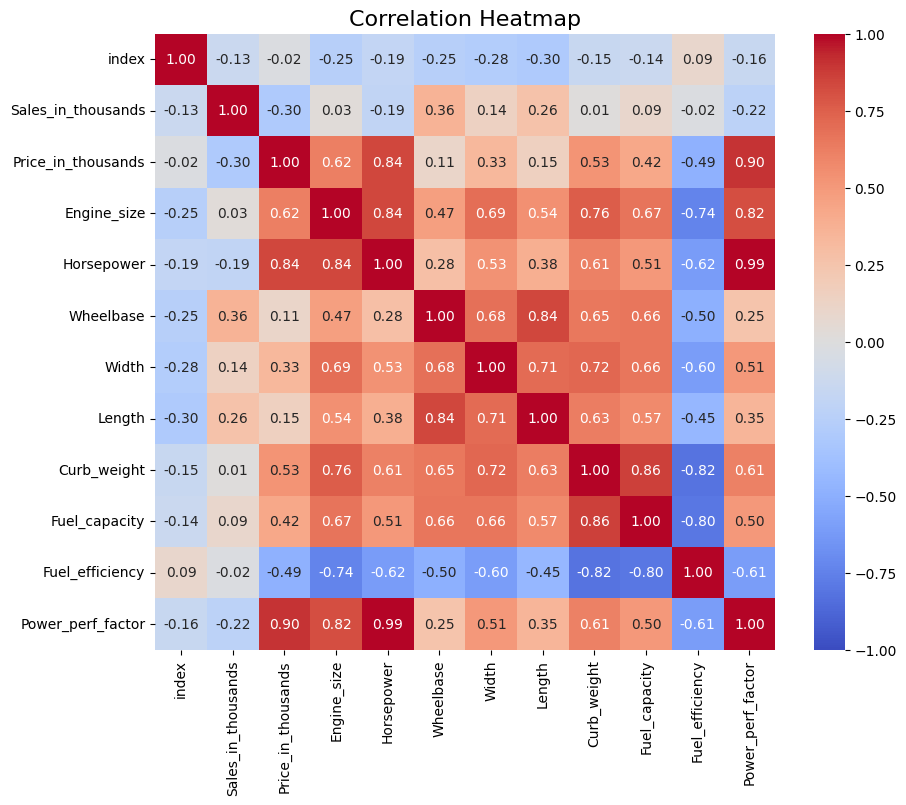

In [17]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

## OLS

In [18]:
FORMULA = """
Sales_in_thousands ~ Price_in_thousands
                     + Horsepower
                     + Engine_size
                     + Wheelbase
                     + Fuel_efficiency
                     + Power_perf_factor
                     + C(Manufacturer)
                     + C(Vehicle_type)
"""

ols_model = sm.OLS.from_formula(FORMULA, data=df)
ols_results = ols_model.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Sales_in_thousands   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     4.496
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           4.09e-10
Time:                        22:58:27   Log-Likelihood:                -791.85
No. Observations:                 152   AIC:                             1658.
Df Residuals:                     115   BIC:                             1770.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      -540.1240    126.574     -4.267      0.000    -790.843    -289.405
C(Manufacturer)[T.Audi]          16.9379     42.674      0.397      0.692     -67.591     101.467
C(Manufacturer)[T.BMW]           -6.1588     41.719     -0.148      0.883     -88.796      76.478
C(Manufacturer)[T.Buick]         13.9880     40.272      0.347      0.729     -65.782      93.758
C(Manufacturer)[T.Cadillac]      -5.4022     40.313     -0.134      0.894     -85.255      74.451
C(Manufacturer)[T.Chevrolet]     26.9931     37.114      0.727      0.469     -46.523     100.510
C(Manufacturer)[T.Chrysler]      -2.1141     37.233     -0.057      0.955     -75.865      71.636
C(Manufacturer)[T.Dodge]         34.3192     36.117      0.950      0.344     -37.222     105.860
C(Manufacturer)[T.Ford]         132.6551     35.579      3.728      0.000      62.179     203.131
C(Manufacturer)[T.Honda]         93.6958     38.540      2.431      0.017      17.355     170.037
C(Manufacturer)[T.Hyundai]       28.3933     43.033      0.660      0.511     -56.848     113.634
C(Manufacturer)[T.Infiniti]       2.2465     59.363      0.038      0.970    -115.339     119.833
C(Manufacturer)[T.Jaguar]       -14.9583     63.623     -0.235      0.815    -140.983     111.067
C(Manufacturer)[T.Jeep]         118.5439     46.824      2.532      0.013      25.794     211.294
C(Manufacturer)[T.Lexus]         27.5754     37.161      0.742      0.460     -46.033     101.184
C(Manufacturer)[T.Lincoln]      -13.0313     43.613     -0.299      0.766     -99.421      73.358
C(Manufacturer)[T.Mercedes-B]    26.0628     36.711      0.710      0.479     -46.655      98.781
C(Manufacturer)[T.Mercury]       -2.8843     37.903     -0.076      0.939     -77.962      72.193
C(Manufacturer)[T.Mitsubishi]    23.3482     36.550      0.639      0.524     -49.051      95.747
C(Manufacturer)[T.Nissan]        41.0988     36.564      1.124      0.263     -31.327     113.524
C(Manufacturer)[T.Oldsmobile]   -11.4034     38.563     -0.296      0.768     -87.789      64.982
C(Manufacturer)[T.Plymouth]     -17.6570     39.327     -0.449      0.654     -95.556      60.242
C(Manufacturer)[T.Pontiac]       17.1865     38.064      0.452      0.652     -58.211      92.584
C(Manufacturer)[T.Porsche]      107.6432     49.144      2.190      0.031      10.298     204.989
C(Manufacturer)[T.Saab]          20.7556     47.831      0.434      0.665     -73.987     115.499
C(Manufacturer)[T.Saturn]        -8.2758     39.214     -0.211      0.833     -85.952      69.400
C(Manufacturer)[T.Subaru]        45.8461     47.735      0.960      0.339     -48.708     140.401
C(Manufacturer)[T.Toyota]        70.8704     35.687      1.986      0.049       0.181     141.559
C(Manufacturer)[T.Volkswagen]    32.5566     

In [19]:
df["log_sales"] = np.log1p(df["Sales_in_thousands"])

In [20]:
FORMULA = """
log_sales ~ Price_in_thousands
            + Wheelbase
            + Fuel_efficiency
            + C(Manufacturer)
"""

ols_model = sm.OLS.from_formula(FORMULA, data=df)
ols_results = ols_model.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     7.519
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           1.49e-16
Time:                        22:58:27   Log-Likelihood:                -156.79
No. Observations:                 152   AIC:                             379.6
Df Residuals:                     119   BIC:                             479.4
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -3.6592      1.830     -2.000      0.048      -7.282      -0.036
C(Manufacturer)[T.Audi]          -0.1944      0.630     -0.309      0.758      -1.441       1.052
C(Manufacturer)[T.BMW]           -0.1300      0.627     -0.207      0.836      -1.371       1.111
C(Manufacturer)[T.Buick]          0.7241      0.588      1.232      0.221      -0.440       1.888
C(Manufacturer)[T.Cadillac]       0.1857      0.592      0.314      0.754      -0.987       1.358
C(Manufacturer)[T.Chevrolet]      0.5705      0.517      1.103      0.272      -0.454       1.595
C(Manufacturer)[T.Chrysler]      -0.1981      0.546     -0.363      0.718      -1.280       0.884
C(Manufacturer)[T.Dodge]          0.2539      0.525      0.484      0.630      -0.785       1.293
C(Manufacturer)[T.Ford]           1.3856      0.512      2.704      0.008       0.371       2.400
C(Manufacturer)[T.Honda]          1.0438      0.567      1.842      0.068      -0.078       2.166
C(Manufacturer)[T.Hyundai]        0.4175      0.642      0.650      0.517      -0.855       1.690
C(Manufacturer)[T.Infiniti]       0.1878      0.886      0.212      0.832      -1.566       1.942
C(Manufacturer)[T.Jaguar]         0.0916      0.891      0.103      0.918      -1.673       1.856
C(Manufacturer)[T.Jeep]           1.8735      0.680      2.755      0.007       0.527       3.220
C(Manufacturer)[T.Lexus]          0.3138      0.551      0.569      0.570      -0.778       1.406
C(Manufacturer)[T.Lincoln]        0.5160      0.635      0.812      0.418      -0.742       1.774
C(Manufacturer)[T.Mercedes-B]     0.4227      0.537      0.787      0.433      -0.641       1.486
C(Manufacturer)[T.Mercury]        0.0671      0.552      0.122      0.903      -1.025       1.159
C(Manufacturer)[T.Mitsubishi]    -0.1536      0.547     -0.281      0.779      -1.237       0.930
C(Manufacturer)[T.Nissan]         0.8480      0.544      1.560      0.121      -0.228       1.924
C(Manufacturer)[T.Oldsmobile]    -0.4346      0.565     -0.769      0.443      -1.553       0.684
C(Manufacturer)[T.Plymouth]      -1.0147      0.589     -1.721      0.088      -2.182       0.153
C(Manufacturer)[T.Pontiac]        0.6108      0.546      1.118      0.266      -0.471       1.692
C(Manufacturer)[T.Porsche]        0.8459      0.690      1.226      0.223      -0.521       2.213
C(Manufacturer)[T.Saab]          -0.2467      0.705     -0.350      0.727      -1.643       1.150
C(Manufacturer)[T.Saturn]        -0.4547      0.572     -0.794      0.429      -1.588       0.679
C(Manufacturer)[T.Subaru]         0.8003      0.711      1.126      0.263      -0.608       2.208
C(Manufacturer)[T.Toyota]         0.9720      0.518      1.877      0.063      -0.053       1.997
C(Manufacturer)[T.Volkswagen]     0.1386     

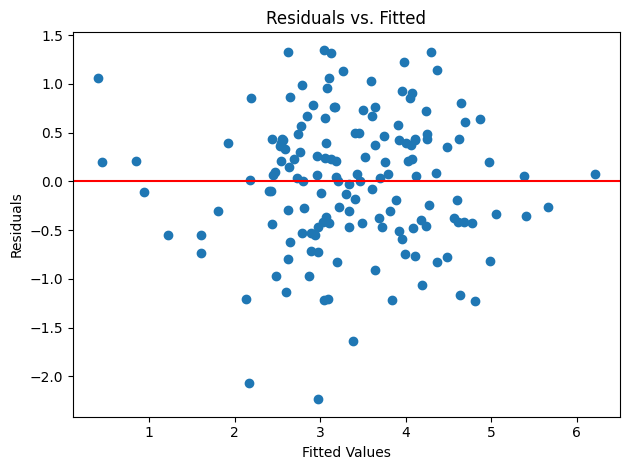

In [21]:
fig, ax = plt.subplots()
ax.scatter(ols_results.fittedvalues, ols_results.resid)
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs. Fitted")
ax.axhline(0, color='red')
fig.tight_layout()
plt.show()

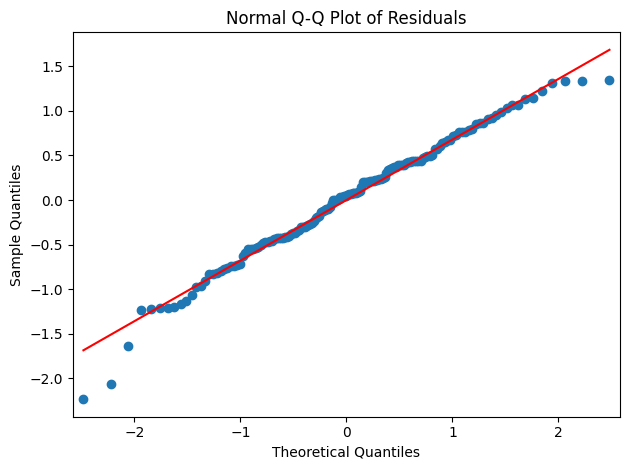

In [22]:
fig, ax = plt.subplots()
sm.qqplot(ols_results.resid, line="s", ax=ax)
ax.set_title("Normal Q-Q Plot of Residuals")
fig.tight_layout()
plt.show()

## GLM

In [23]:
FORMULA = """
Sales_in_thousands ~ Price_in_thousands
                     + Wheelbase
                     + Fuel_efficiency
                     + C(Manufacturer)
"""

glm_model = smf.glm(
    formula=FORMULA,
    data=df,
    family=sm.families.NegativeBinomial()
)
glm_results = glm_model.fit()

print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     Sales_in_thousands   No. Observations:                  152
Model:                            GLM   Df Residuals:                      119
Model Family:        NegativeBinomial   Df Model:                           32
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -692.88
Date:                Sun, 07 Dec 2025   Deviance:                       66.645
Time:                        22:58:28   Pearson chi2:                     56.6
No. Iterations:                    10   Pseudo R-squ. (CS):             0.5751
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## GAM

In [24]:
from pygam import PoissonGAM, s

X = df[["Price_in_thousands", "Horsepower", "Wheelbase", "Fuel_efficiency"]].values
y = df["Sales_in_thousands"].values

gam = PoissonGAM(
    s(0, n_splines=8) +
    s(1, n_splines=8) +
    s(2, n_splines=8) +
    s(3, n_splines=8),
    lam=10
).fit(X, y)


The GAM model is

$$log(Q)=s_1(P) + s_2(HorsePower) + s_3(WheelBase)+s_4(Fuel)$$
where $s_j$ is a spline function. Price elasticity of demand is
$$E=\dfrac{\partial Q}{\partial P}\dfrac{P}{Q}=Q\left(\dfrac{\partial s_1}{\partial P}\right)_{controls}\dfrac{P}{Q}$$
or
$$E=P\left(\dfrac{\partial s_1}{\partial P}\right)_{controls}$$
We can calculate the elasticity with numerical differentiation.

In [25]:
price_grid = np.linspace(
    df["Price_in_thousands"].min(),
    df["Price_in_thousands"].max(),
    200
)

hp_mean = df["Horsepower"].mean()
wb_mean = df["Wheelbase"].mean()
fe_mean = df["Fuel_efficiency"].mean()

X_grid = np.column_stack([
    price_grid,
    np.full_like(price_grid, hp_mean),
    np.full_like(price_grid, wb_mean),
    np.full_like(price_grid, fe_mean)
])


In [26]:
h = 0.1   # small price increment in thousands

X_plus  = X_grid.copy()
X_minus = X_grid.copy()

X_plus[:, 0]  += h
X_minus[:, 0] -= h

mu_plus  = gam.predict(X_plus)
mu_minus = gam.predict(X_minus)

mu_plus  = np.clip(mu_plus, 1e-8, None)
mu_minus = np.clip(mu_minus, 1e-8, None)

d_log_mu_d_price = (np.log(mu_plus) - np.log(mu_minus)) / (2 * h)

elasticity_curve = price_grid * d_log_mu_d_price


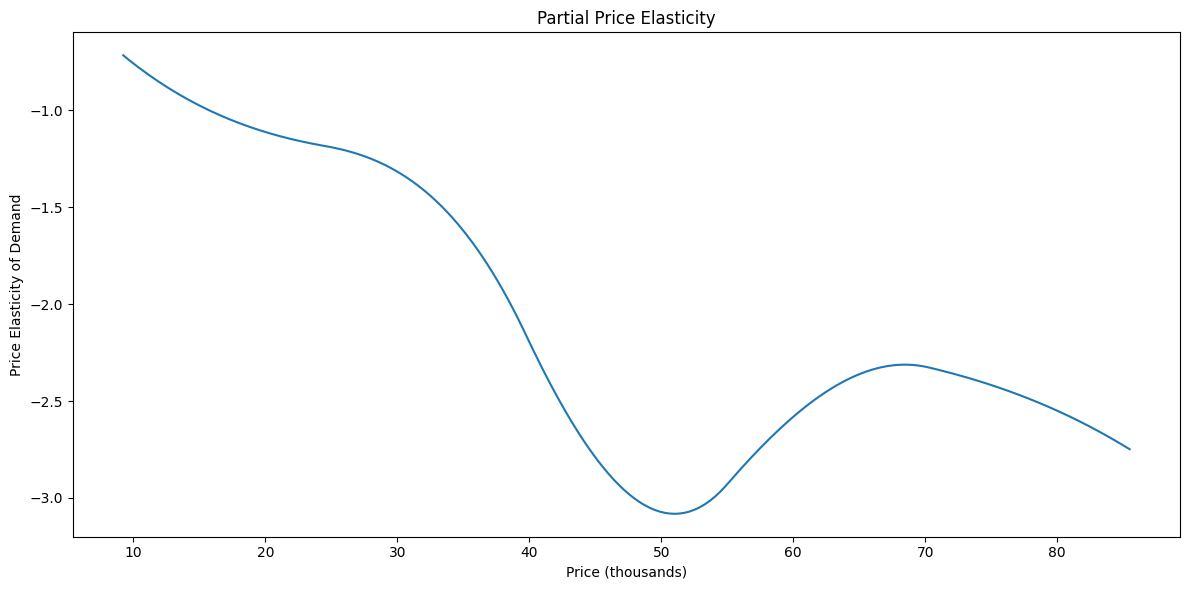

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(price_grid, elasticity_curve)
plt.xlabel("Price (thousands)")
plt.ylabel("Price Elasticity of Demand")
plt.title("Partial Price Elasticity")
plt.tight_layout()
plt.show()


- Prices 10k-30k:

    - Buyers in this range tend to be budget-conscious, but not extremely sensitive.
    - Discounts increase volume modestly.
    - Raising price will reduce sales, but not catastrophically.

- Prices 30k-50k:

  - Buyers compare across many models — sensitivity spikes.
  - A small price increase triggers a switch to a near substitute.
  - Deals/discounts strongly influence volume.
- Prices 50k+
  - Buyers become somewhat less price sensitive at the beginning of luxury range (status-driven purchases).
  - But at very high prices (>70k), elasticity increases again because we have very few buyers